<a href="https://colab.research.google.com/github/mpatel5/FoundationsOfDataScience/blob/main/PythonProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load dataset
url = "https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,s,s,s,s,s,s,s,na,na
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1,6.3,15,93.8,7,43.8,na,na
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74,1,11.1,8,88.9,2,22.2,na,na
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,s,s,s,s,s,s,s,na,na
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,s,s,s,s,s,s,s,na,na


In [5]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
212326,False
212327,False
212328,False
212329,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212331 entries, 0 to 212330
Data columns (total 15 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   School DBN                   212331 non-null  object
 1   School Name                  212331 non-null  object
 2   School Level                 212331 non-null  object
 3   Regents Exam                 212321 non-null  object
 4   Year                         212331 non-null  int64 
 5   Total Tested                 212331 non-null  int64 
 6   Mean Score                   212331 non-null  object
 7   Number Scoring Below 65      212331 non-null  object
 8   Percent Scoring Below 65     212331 non-null  object
 9   Number Scoring 65 or Above   212331 non-null  object
 10  Percent Scoring 65 or Above  212331 non-null  object
 11  Number Scoring 80 or Above   212331 non-null  object
 12  Percent Scoring 80 or Above  212331 non-null  object
 13  Number Scoring

In [7]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)


Categorical columns : ['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Mean Score', 'Number Scoring Below 65', 'Percent Scoring Below 65', 'Number Scoring 65 or Above', 'Percent Scoring 65 or Above', 'Number Scoring 80 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR']
Numerical columns : ['Year', 'Total Tested']


In [8]:
df[cat_col].nunique()



,0
School DBN,1018
School Name,1012
School Level,6
Regents Exam,14
Mean Score,748
Number Scoring Below 65,446
Percent Scoring Below 65,992
Number Scoring 65 or Above,945
Percent Scoring 65 or Above,992
Number Scoring 80 or Above,744


In [9]:
#clean data: Remove rows where the "Mean Score" column has missing values to ensure accurate analysis

df_cleaned = df.dropna(subset=["Mean Score"])


In [18]:
# List schools with valid Average Mean Score values
# Convert 'Mean Score' to numeric, handling errors by coercing to NaN
df_cleaned["Mean Score"] = pd.to_numeric(df_cleaned["Mean Score"], errors="coerce")

# Group by School Name and calculate average Mean Score for each school
# Remove rows with NaN values in 'Mean Score' and sort
valid_schools = df_cleaned.groupby("School Name")["Mean Score"].mean().dropna().sort_values(ascending=False)

# Display the top 10 schools with the highest average scores
print(valid_schools.head(10))

School Name
Stuyvesant High School                               91.697786
J.H.S. 185 Edward Bleeker                            91.689130
The Anderson School                                  91.355814
The Christa McAuliffe School\I.S. 187                90.968182
East Side Middle School                              90.412500
J.H.S. 074 Nathaniel Hawthorne                       90.240580
Bronx High School of Science                         90.189426
New York City Lab Middle School for Collaborative    90.163889
J.H.S. 167 Robert F. Wagner                          89.871111
Townsend Harris High School                          89.696743
Name: Mean Score, dtype: float64


In [19]:
# Select a school with valid scores
selected_school = "Bronx High School of Science"
school_mean_score = valid_schools[selected_school]


In [21]:
# Descriptive statistics
# Compute the mean score for all schools and compare to selected school
all_schools_mean_score = valid_schools.drop(selected_school).mean()

print(f"{selected_school} Mean Score: {school_mean_score:.2f}")
print(f"All Schools' Average Mean Score: {all_schools_mean_score:.2f}")



Bronx High School of Science Mean Score: 90.19
All Schools' Average Mean Score: 68.66


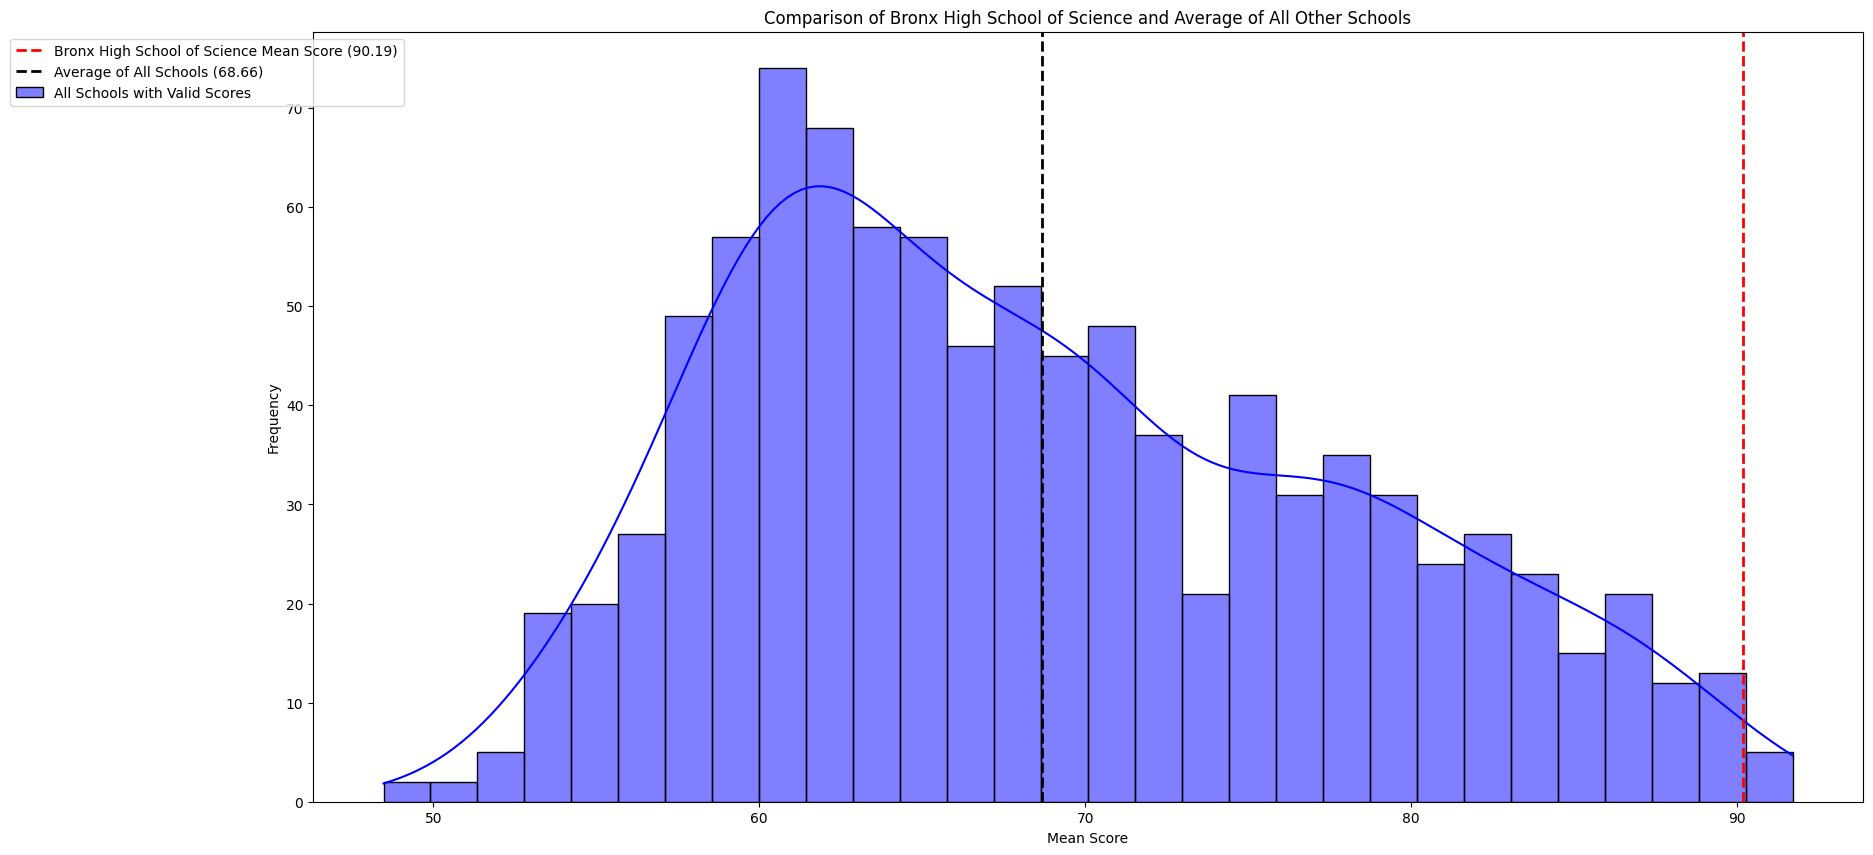

In [23]:
# Visualization
plt.figure(figsize=(20, 10))
sns.histplot(valid_schools, bins=30, kde=True, color="blue", label="All Schools with Valid Scores")

# Add vertical lines for the selected school and the average of all schools
plt.axvline(school_mean_score, color="red", linestyle="dashed", linewidth=2,
            label=f"{selected_school} Mean Score ({school_mean_score:.2f})")
plt.axvline(all_schools_mean_score, color="black", linestyle="dashed", linewidth=2,
            label=f"Average of All Schools ({all_schools_mean_score:.2f})")

# Labels and title
plt.legend(loc='upper left', bbox_to_anchor=(-0.2, 1), ncol=1)  # Move legend to the left of the chart
plt.title("Comparison of Bronx High School of Science and Average of All Other Schools")
plt.xlabel("Mean Score")
plt.ylabel("Frequency")
plt.show()



In [24]:
conclusion = """
The histogram visualizes the comparison between the mean score of Bronx High School of Science
and the average mean score of all schools in the dataset.

- The red dashed line represents the mean score of Bronx High School of Science, which allows
  us to assess how this school performs relative to all schools.
- The black dashed line marks the overall average of all schools with valid scores, providing a
  benchmark for performance comparison.

From the plot, it is clear that Bronx High School of Science has a higher mean score than the
average of all schools, which highlights the school's strong performance. This comparison
allows for a deeper understanding of how the selected school stands out in relation to the broader
educational landscape within the dataset. Further exploration into factors contributing to this
disparity could provide valuable insights for educational improvements.
"""

print(conclusion)


The histogram visualizes the comparison between the mean score of Bronx High School of Science
and the average mean score of all schools in the dataset.

- The red dashed line represents the mean score of Bronx High School of Science, which allows
  us to assess how this school performs relative to all schools.
- The black dashed line marks the overall average of all schools with valid scores, providing a
  benchmark for performance comparison.

From the plot, it is clear that Bronx High School of Science has a higher mean score than the
average of all schools, which highlights the school's strong performance. This comparison
allows for a deeper understanding of how the selected school stands out in relation to the broader
educational landscape within the dataset. Further exploration into factors contributing to this
disparity could provide valuable insights for educational improvements.



In [33]:
# Group by School Level and calculate the average Mean Score
school_level_mean_score = df_cleaned.groupby("School Level")["Mean Score"].mean()

In [34]:
# Clean data by removing non-numeric or NaN values
school_level_mean_score_cleaned = school_level_mean_score[pd.to_numeric(school_level_mean_score, errors='coerce').notna()]

In [30]:
# Print the cleaned valid data
print(school_level_mean_score_cleaned)

School Level
Elementary                         67.800000
High school                        64.399895
Junior High-Intermediate-Middle    76.907964
K-12 all grades                    71.184131
K-8                                76.882459
Secondary School                   66.352460
Name: Mean Score, dtype: float64


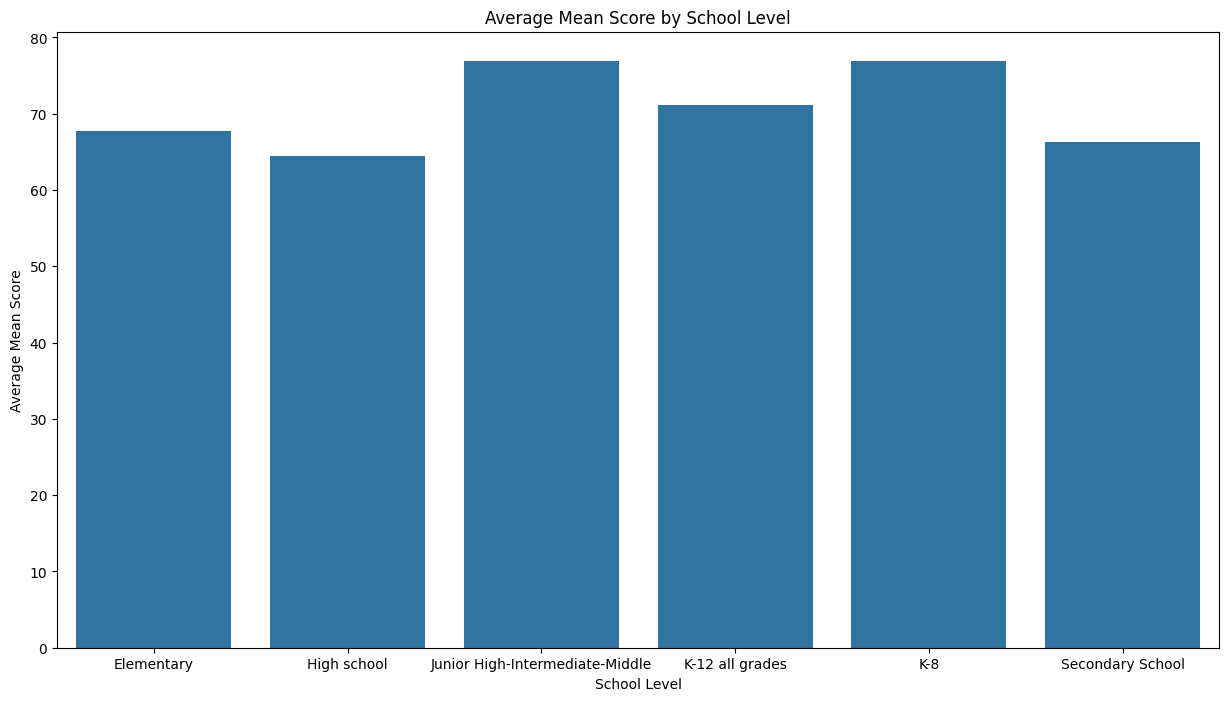

In [31]:
# Visualization without palette
plt.figure(figsize=(15, 8))
sns.barplot(x=school_level_mean_score_cleaned.index, y=school_level_mean_score_cleaned.values)
plt.title("Average Mean Score by School Level")
plt.xlabel("School Level")
plt.ylabel("Average Mean Score")
plt.show()


In [28]:
# Conclusion Statement for School Level Comparison
conclusion = """
Based on the analysis of the mean scores across different school levels, it appears that high schools have the lowest average mean scores compared to middle and elementary schools.
This trend suggests that the performance on the Regents Exam may be more challenging for high school students, possibly due to the complexity of the exam or other external factors.
Further investigation into specific school-level programs, teaching methods, and student demographics could help explain these differences.
"""

print(conclusion)


Based on the analysis of the mean scores across different school levels, it appears that high schools have the lowest average mean scores compared to middle and elementary schools.
This trend suggests that the performance on the Regents Exam may be more challenging for high school students, possibly due to the complexity of the exam or other external factors.
Further investigation into specific school-level programs, teaching methods, and student demographics could help explain these differences.

